***

# HEART ATTACK ANALYSIS AND PREDICTION

The leading cause of death in the United States is heart disease, which is responsible for approximately 25% of all deaths in the country. This dataset details the vitals, conditions, and demographics of various patients, including whether or not they have heart disease. By analyzing the data and examining these features, it is possible to create classification models that can predict wheter or not a patient has heart disease. This notebook focuses on analyzing the dataset and creating a classification model with high accuracy in order to predict the likelihood of a future patient having heart disease.

***

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print("Setup Complete.")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv
Setup Complete.


In [2]:
# Importing Libraries
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

print("Library Setup Complete.")

Library Setup Complete.


***

# READING FILES

In [3]:
# Reading Data
heart_filepath =  "../input/heart-attack-analysis-prediction-dataset/heart.csv"
heart_data = pd.read_csv(heart_filepath)
print("Read Complete.")

Read Complete.


In [4]:
# Examining Data
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Examining Data
heart_data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Determining size
heart_data.shape

(303, 14)

In [7]:
# Examining statistics
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Determining data types
heart_data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [9]:
# Looking for unfilled values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

***

# UNIVARIATE ANALYSIS

<AxesSubplot:title={'center':'Age of Patients'}, xlabel='age', ylabel='count'>

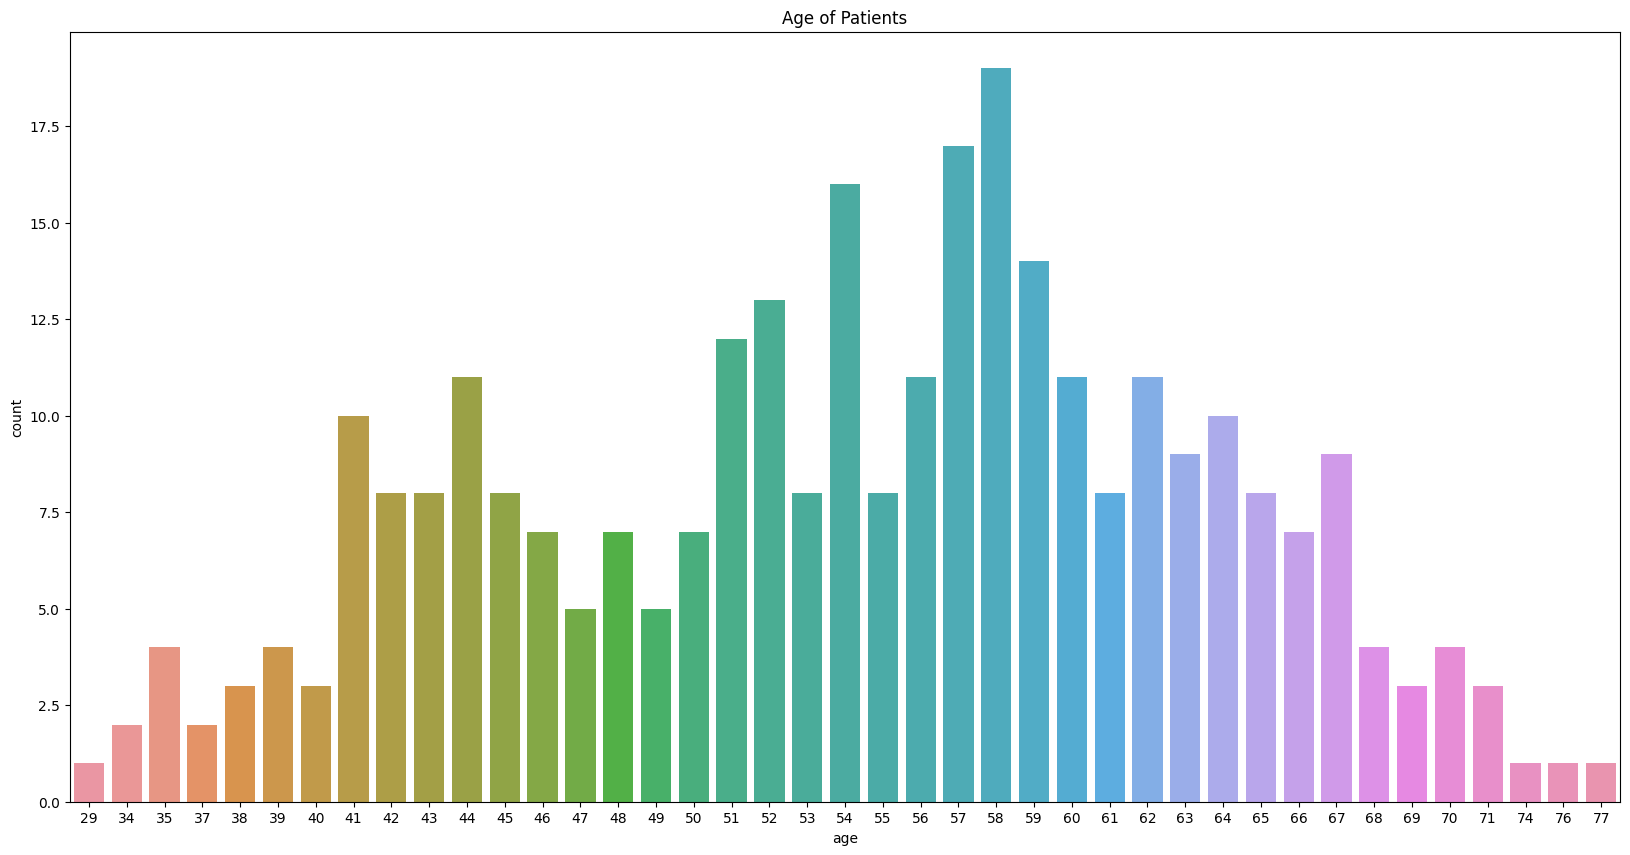

In [10]:
# Age distribution
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x=heart_data["age"])

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

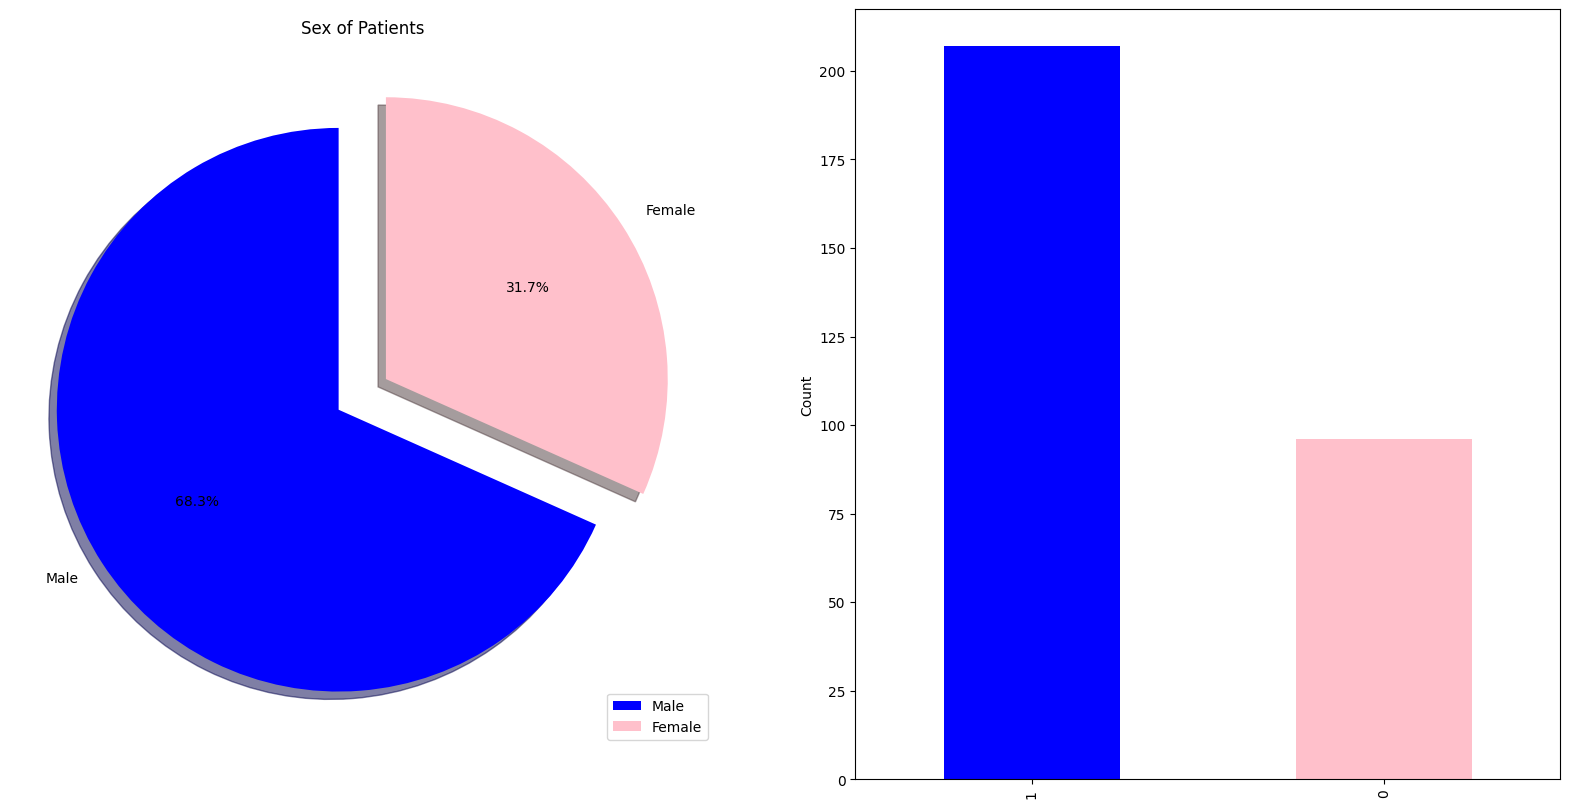

In [11]:
# Sex distribution
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sex_labels = ['Male', 'Female']
sex_explode = (0.1, 0.1)
plt.pie(heart_data['sex'].value_counts(), labels = sex_labels, startangle=90, shadow=True, explode= sex_explode, autopct='%1.1f%%', colors = ['blue', 'pink'])
plt.title("Sex of Patients")
plt.legend(loc = "lower right")
plt.subplot(1,2,2)
heart_data['sex'].value_counts().plot(kind= 'bar',color=['blue', 'pink'])
plt.ylabel("Count")
plt.xticks()

In [12]:
# Assigning meaning to chest pain values
cp_data = heart_data["cp"].value_counts().reset_index()
cp_data
cp_data['index'][0] = 'asymptomatic'
cp_data['index'][1] = 'non-anginal'
cp_data['index'][2] = 'atypical'
cp_data['index'][3] = 'typical'
cp_data

,index,cp
0,asymptomatic,143
1,non-anginal,87
2,atypical,50
3,typical,23


Text(0.5, 0, '')

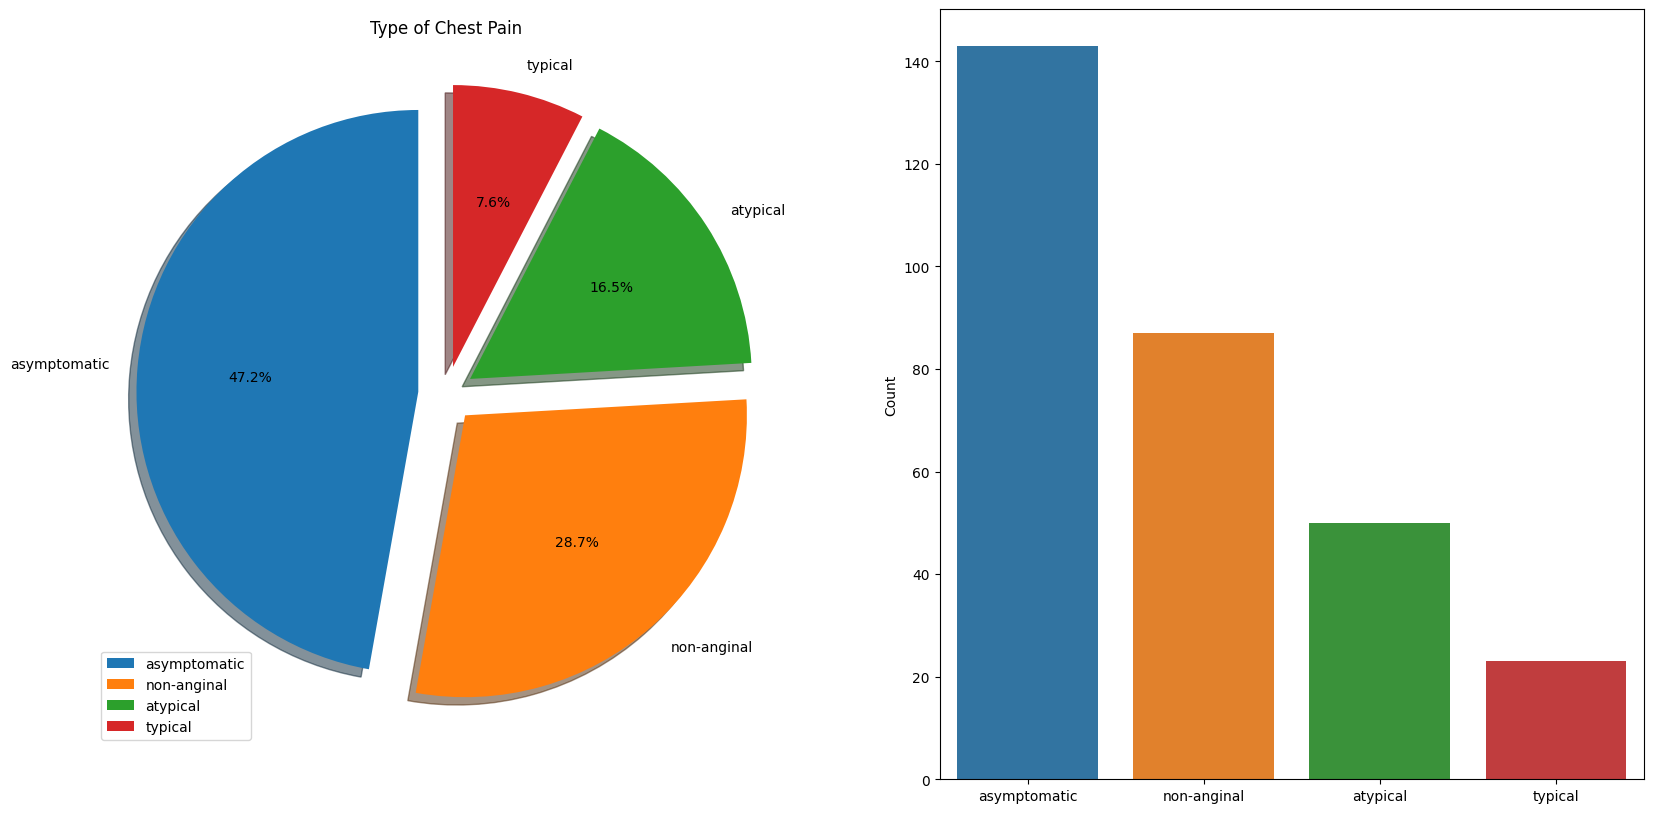

In [13]:
# Chest pain distribution
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
cp_labels = ['asymptomatic', 'non-anginal', 'atypical', 'typical']
cp_explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(heart_data['cp'].value_counts(), labels = cp_labels, startangle= 90, shadow= True, explode= cp_explode, autopct='%1.1f%%')
plt.title("Type of Chest Pain")
plt.legend(loc = 'lower left')
plt.subplot(1,2,2)
sns.barplot(x=cp_data["index"],y=cp_data["cp"])
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.xlabel("")

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

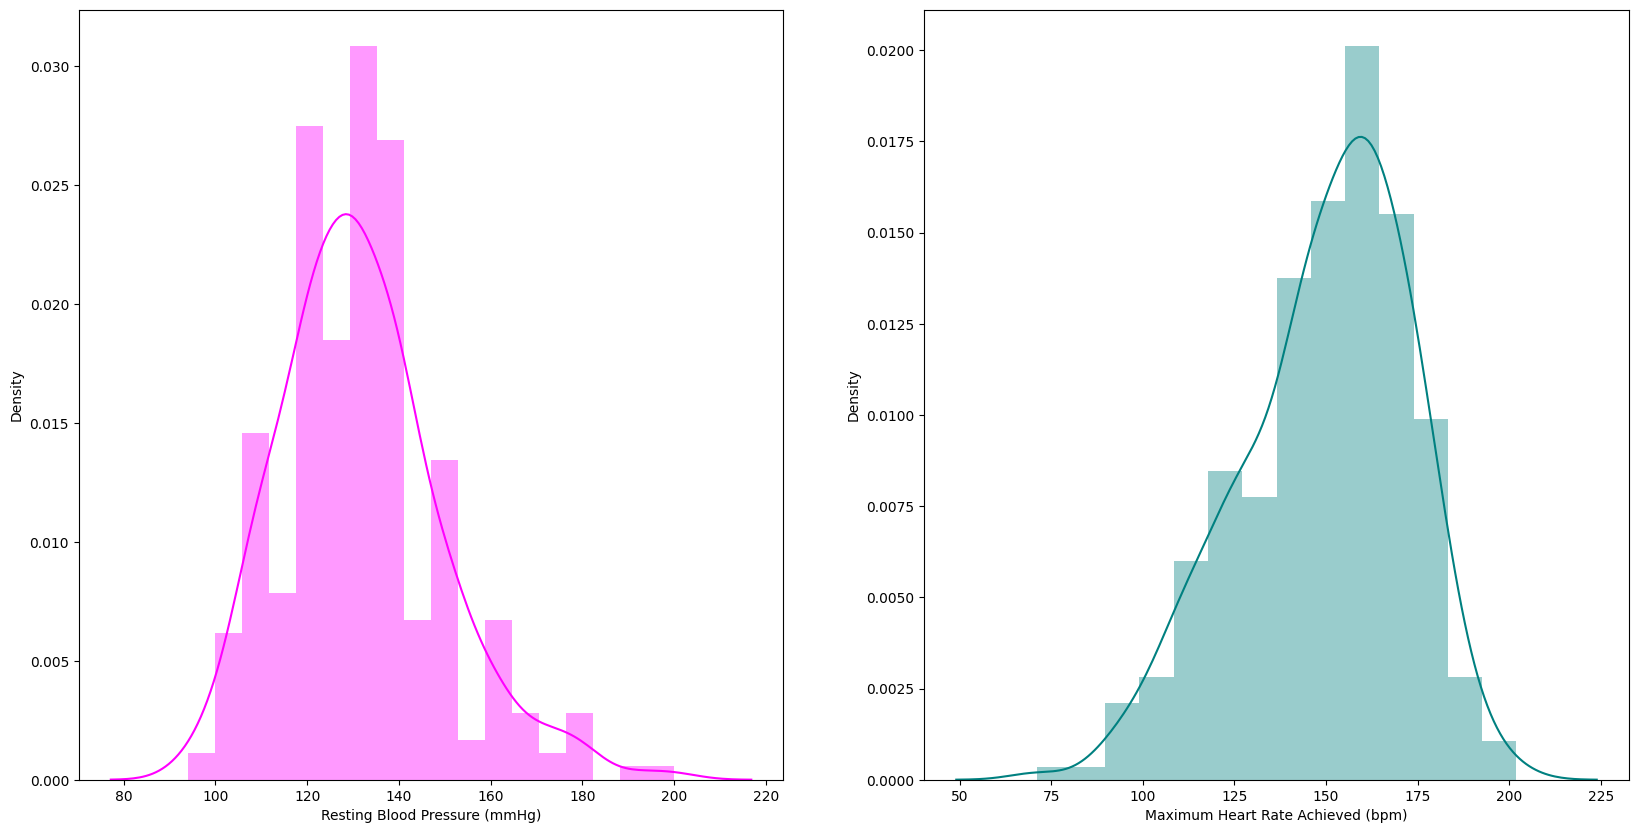

In [14]:
# Blood pressure and heart rate distribution
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(heart_data['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(heart_data['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

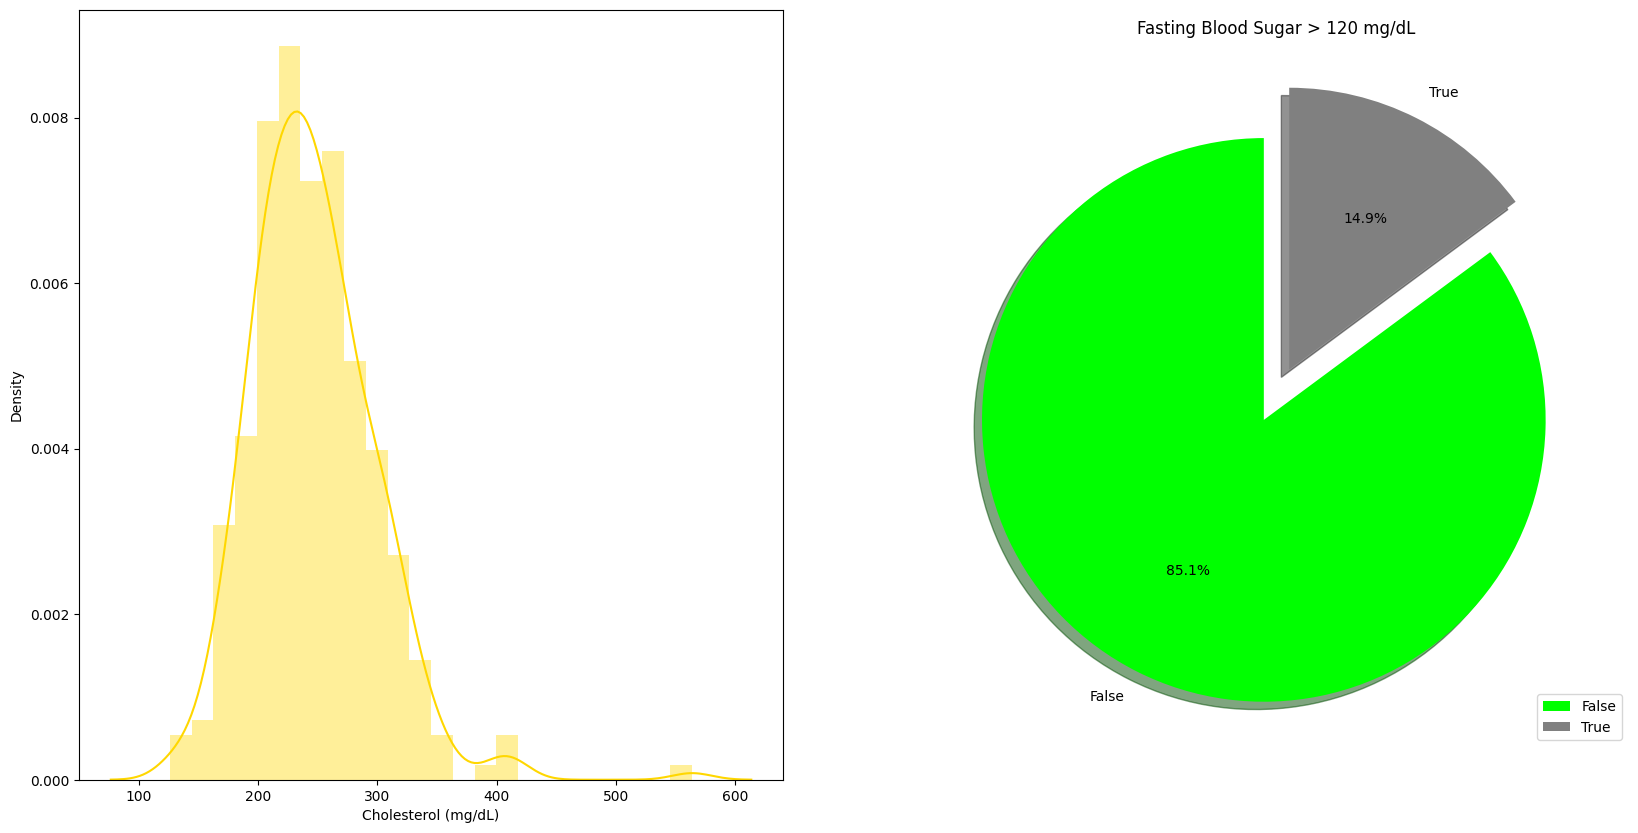

In [15]:
# Cholesterol and fasting blood sugar distribution
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(heart_data['chol'], kde=True, color = 'Gold')

plt.xlabel("Cholesterol (mg/dL)")
plt.subplot(1,2,2)
fbs_labels = ['False', 'True']
fbs_explode = (0.1, 0.1)
fbs_colors = ['lime', 'grey']
plt.pie(heart_data['fbs'].value_counts(), labels = fbs_labels, startangle=90, shadow=True, explode= fbs_explode, autopct='%1.1f%%', colors = fbs_colors)
plt.title("Fasting Blood Sugar > 120 mg/dL")
plt.legend(loc = "lower right")

Text(0.5, 0, 'ST Depression Induced by Exercise Relative to Rest')

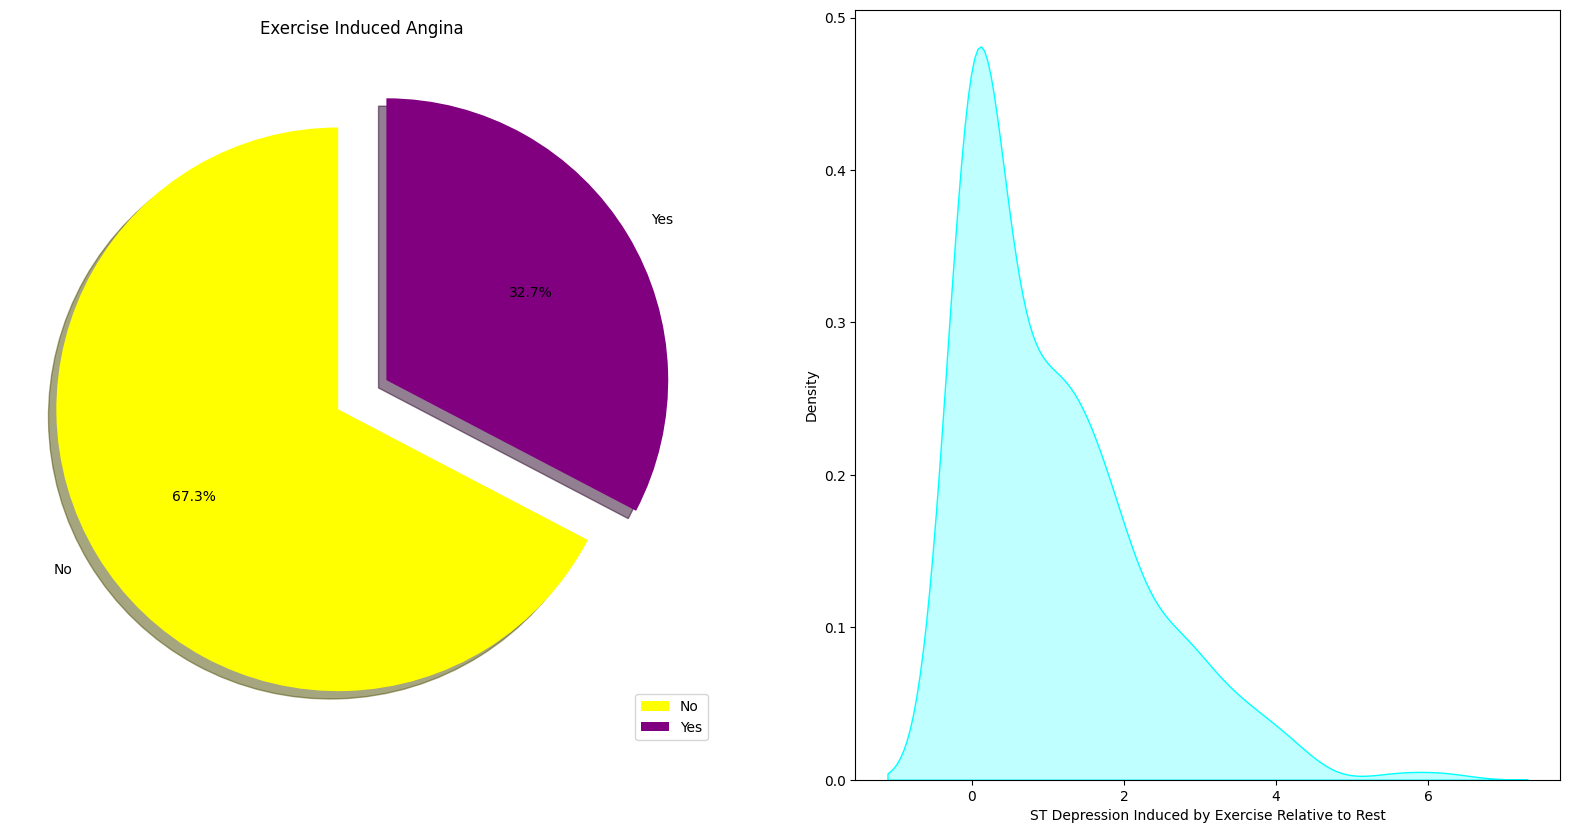

In [16]:
# Exercise angina and ST Depression distribution
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
exng_labels = ['No', 'Yes']
exng_explode = (0.1, 0.1)
exng_colors = ['yellow', 'purple']
plt.pie(heart_data['exng'].value_counts(), labels = exng_labels, startangle=90, shadow=True, explode= exng_explode, autopct='%1.1f%%', colors = exng_colors)
plt.title("Exercise Induced Angina")
plt.legend(loc = "lower right")
plt.subplot(1,2,2)
sns.kdeplot(heart_data['oldpeak'], color = 'cyan', shade = True)
plt.xlabel("ST Depression Induced by Exercise Relative to Rest")


In [17]:
# Assigning meaning to ECG values
ecg_data = heart_data["restecg"].value_counts().reset_index()
ecg_data['index'][0] = 'normal'
ecg_data['index'][1] = 'hypertrophy'
ecg_data['index'][2] = 'ST-T abnormality'
ecg_data

,index,restecg
0,normal,152
1,hypertrophy,147
2,ST-T abnormality,4


In [18]:
# Assigning meaning to slope of ST-segment values
slp_data = heart_data["slp"].value_counts().reset_index()
slp_data['index'][0]= 'upsloping'
slp_data['index'][1]= 'flat'
slp_data['index'][2]= 'downsloping'
slp_data

,index,slp
0,upsloping,142
1,flat,140
2,downsloping,21


Text(0.5, 0, 'Slope of the Peak Exercise ST Segment')

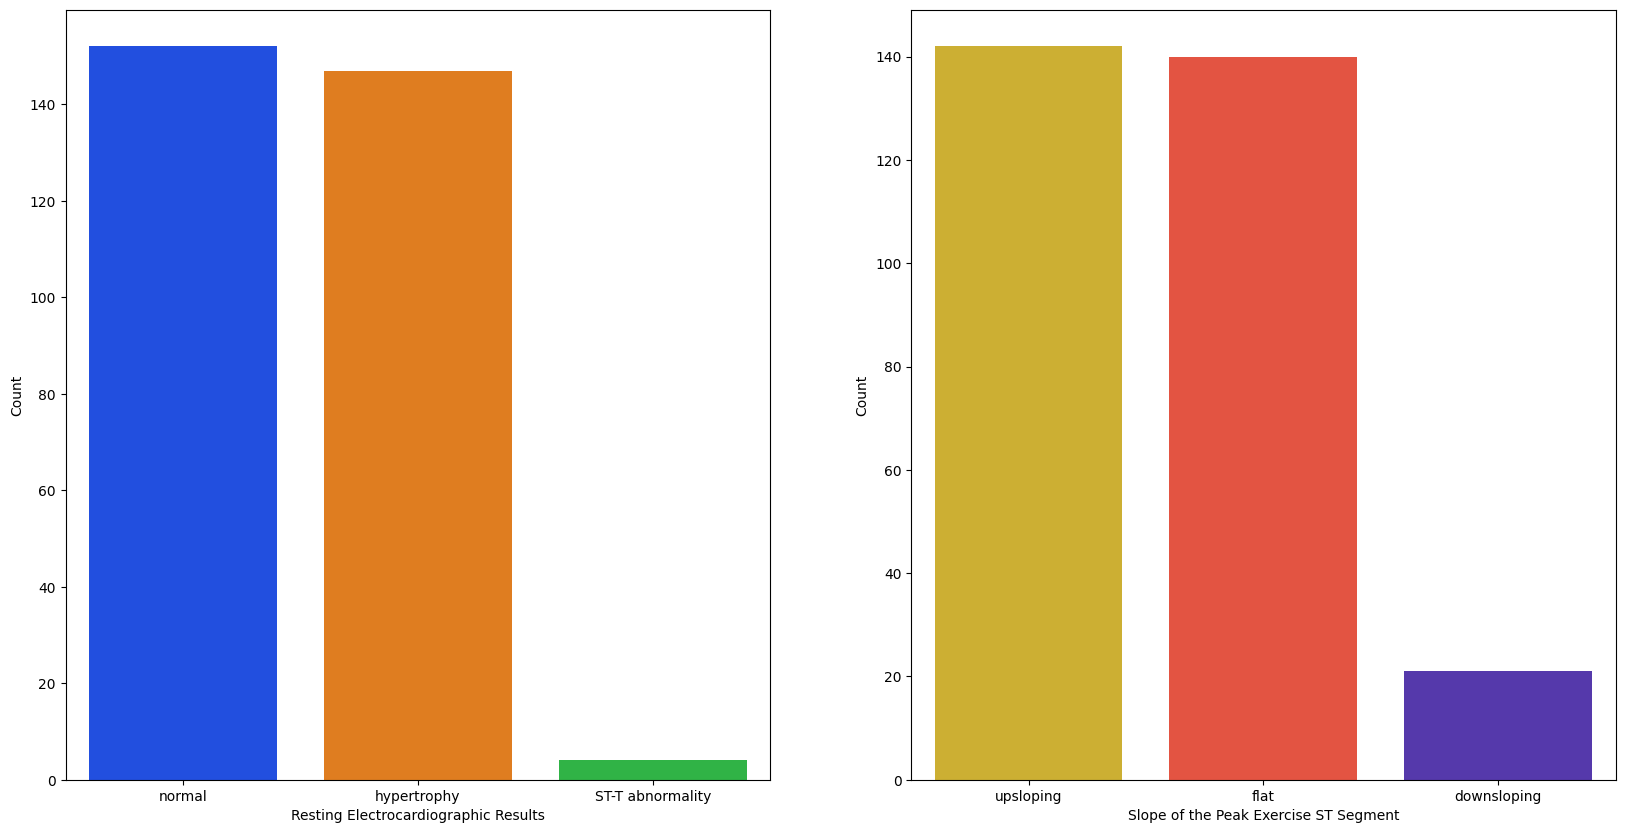

In [19]:
# ECG and ST-segment distribution
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=ecg_data["index"],y=ecg_data["restecg"], palette = 'bright')
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.xlabel("Resting Electrocardiographic Results")
plt.subplot(1,2,2)
sns.barplot(x=slp_data["index"],y=slp_data["slp"], palette = 'CMRmap_r')
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.xlabel("Slope of the Peak Exercise ST Segment")

In [20]:
# Assigning unknown to missing major vessel values 
caa_data = heart_data["caa"].value_counts().reset_index()
caa_data['index'][4] = "unknown"
caa_data

,index,caa
0,0,175
1,1,65
2,2,38
3,3,20
4,unknown,5


In [21]:
# Assigning unknown to missing Thalassemia values 
thall_data = heart_data["thall"].value_counts().reset_index()
thall_data['index'][3] = "unknown"
thall_data

,index,thall
0,2,166
1,3,117
2,1,18
3,unknown,2


Text(0.5, 0, 'Form of Thalassemia')

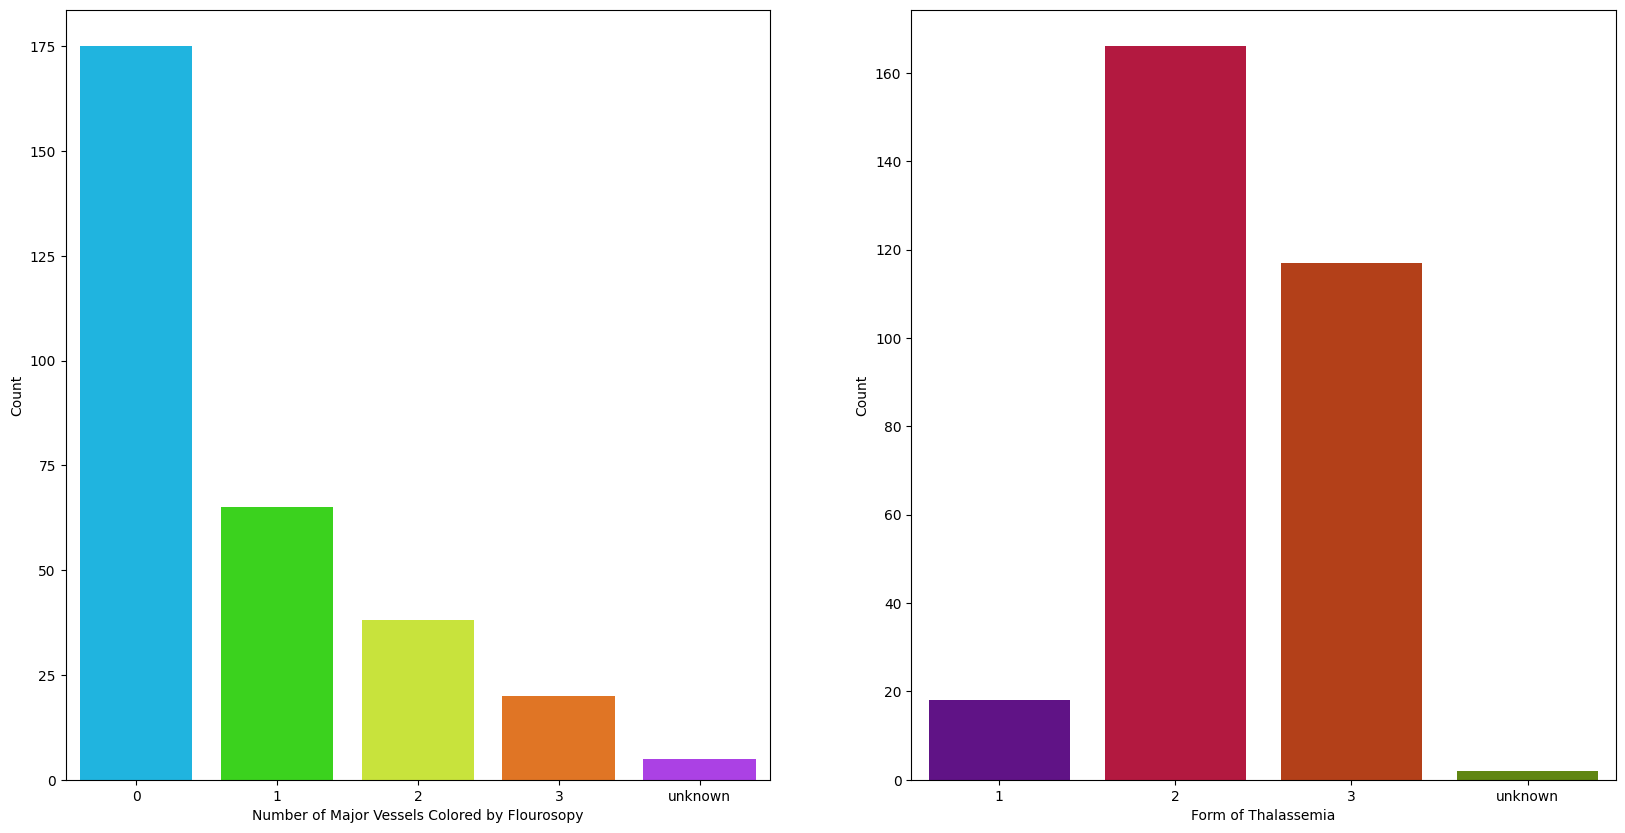

In [22]:
# Major vessels and Thalassemia
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=caa_data["index"],y=caa_data["caa"], palette = 'gist_ncar')
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.xlabel("Number of Major Vessels Colored by Flourosopy")
plt.subplot(1,2,2)
sns.barplot(x = thall_data['index'], y=thall_data["thall"], palette = 'brg', order = [1,2,3,'unknown'])
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.xlabel("Form of Thalassemia")

***

# BIVARIATE ANALYSIS

<AxesSubplot:>

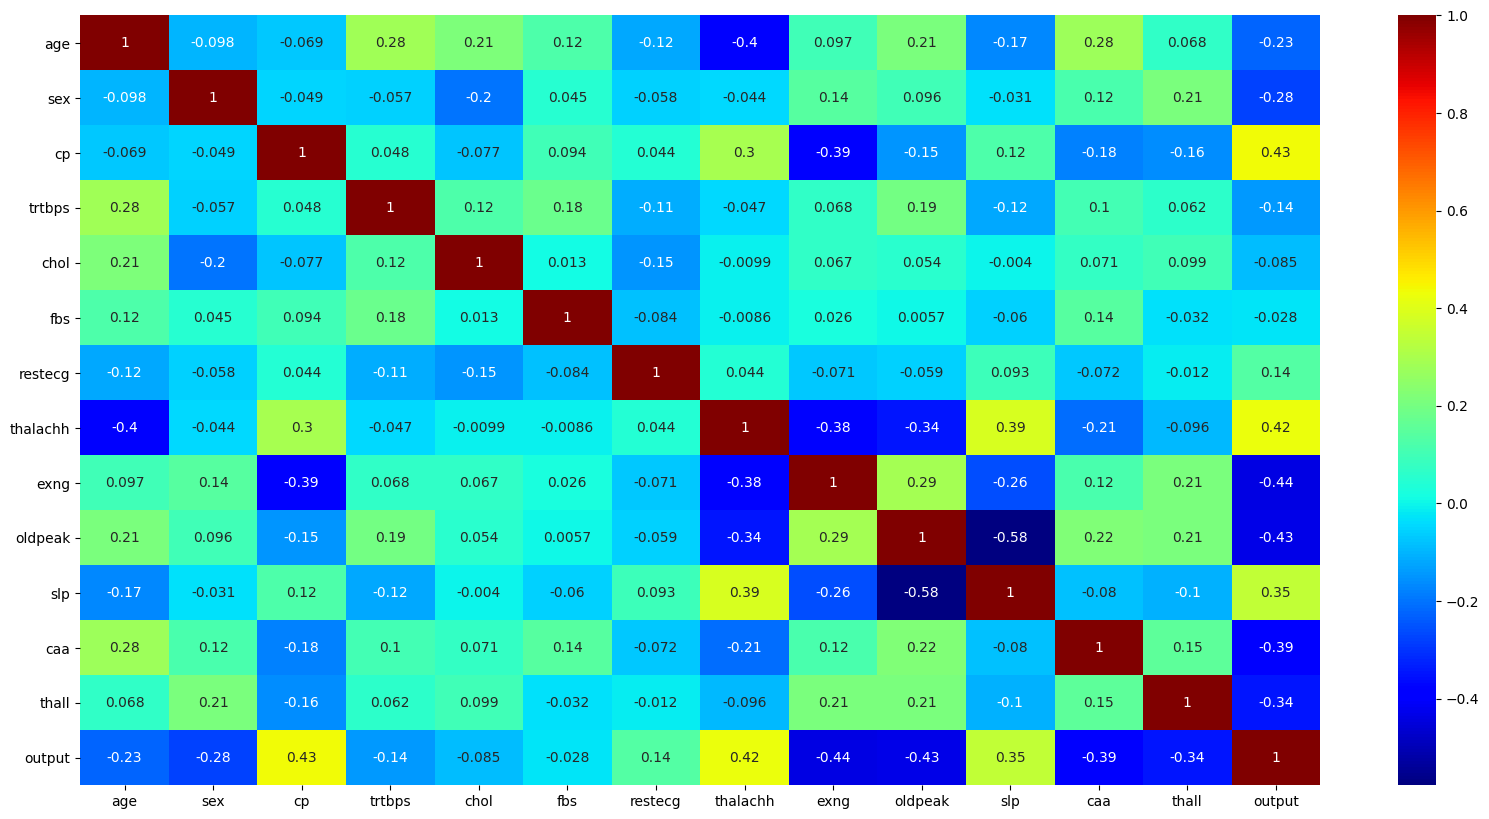

In [23]:
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(heart_data.corr(),annot=True,cmap="jet")

<Figure size 2000x1000 with 0 Axes>

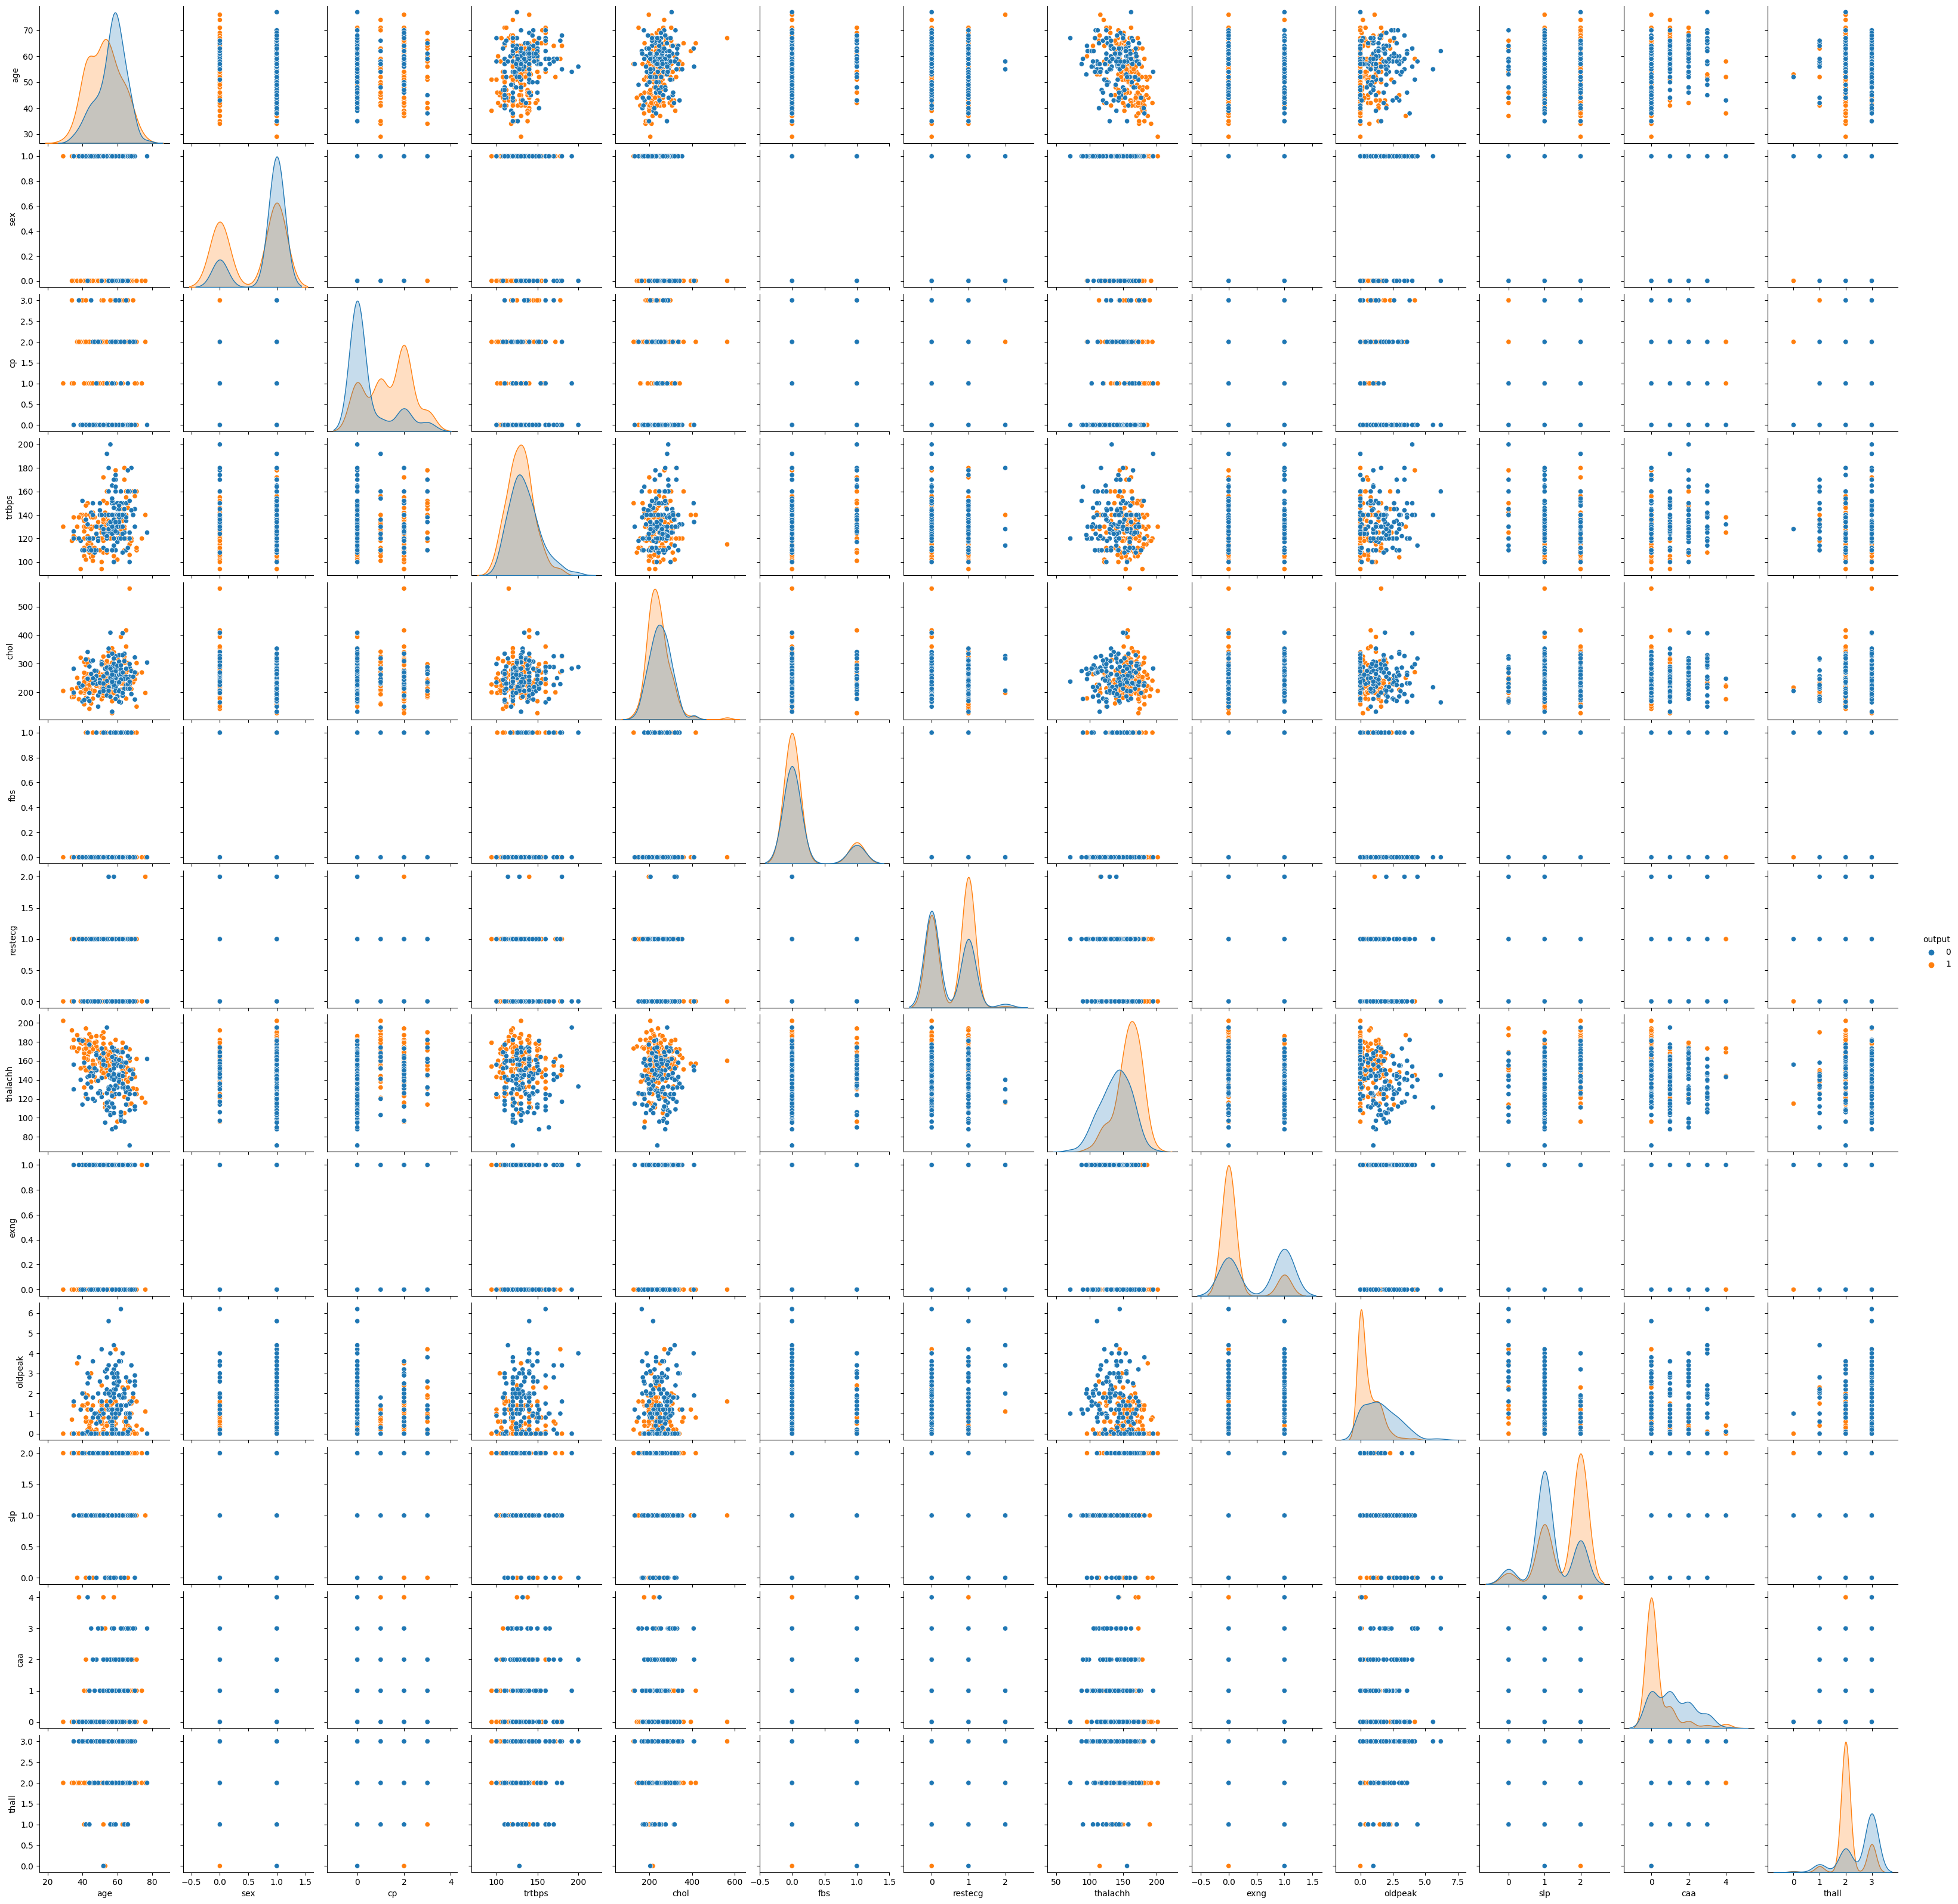

In [24]:
# Pairplot
plt.figure(figsize=(20,10))
sns.pairplot(heart_data, hue= 'output')

In [25]:
# Analysis of continuous features with respect to output
ff_age = ff.create_distplot([heart_data[heart_data.output==1].age,heart_data[heart_data.output==0].age],["Heart Disease","No Heart Disease"], colors = ['red', 'blue'])
ff_age.update_layout(title="Distribution of Heart Disease with Respect to Age", xaxis_title="Age")
ff_age.show()
ff_bp = ff.create_distplot([heart_data[heart_data.output==1].trtbps,heart_data[heart_data.output==0].trtbps],["Heart Disease","No Heart Disease"], colors = ['red', 'blue'])
ff_bp.update_layout(title="Distribution of Heart Disease with Respect to Blood Pressure (mmHg)", xaxis_title="Blood Pressure (mmHg)")
ff_bp.show()
ff_hr = ff.create_distplot([heart_data[heart_data.output==1].thalachh,heart_data[heart_data.output==0].thalachh],["Heart Disease","No Heart Disease"], colors = ['red', 'blue'])
ff_hr.update_layout(title="Distribution of Heart Disease with Respect to Maxiumum Heart Rate Achieved (bpm)", xaxis_title="Maxiumum Heart Rate Achieved (bpm)")
ff_hr.show()
ff_chol = ff.create_distplot([heart_data[heart_data.output==1].chol,heart_data[heart_data.output==0].chol],["Heart Disease","No Heart Disease"], colors = ['red', 'blue'])
ff_chol.update_layout(title="Distribution of Heart Disease with Respect to Cholesterol (mg/dL)", xaxis_title="Cholesterol")
ff_chol.show()
ff_op = ff.create_distplot([heart_data[heart_data.output==1].oldpeak,heart_data[heart_data.output==0].oldpeak],["Heart Disease","No Heart Disease"], colors = ['red', 'blue'])
ff_op.update_layout(title="Distribution of Heart Disease with Respect to Exercise induced ST segment depression", xaxis_title="ST segment depression")
ff_op.show()

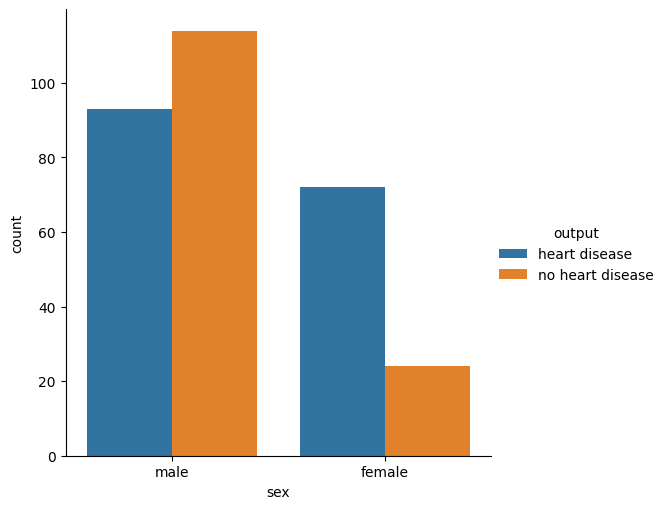

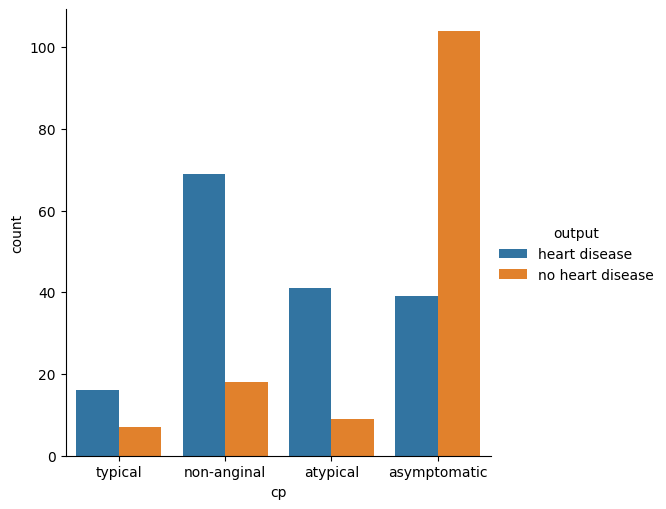

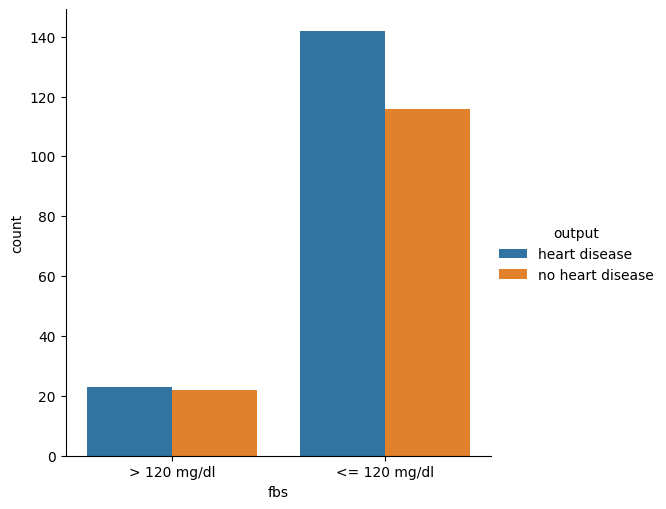

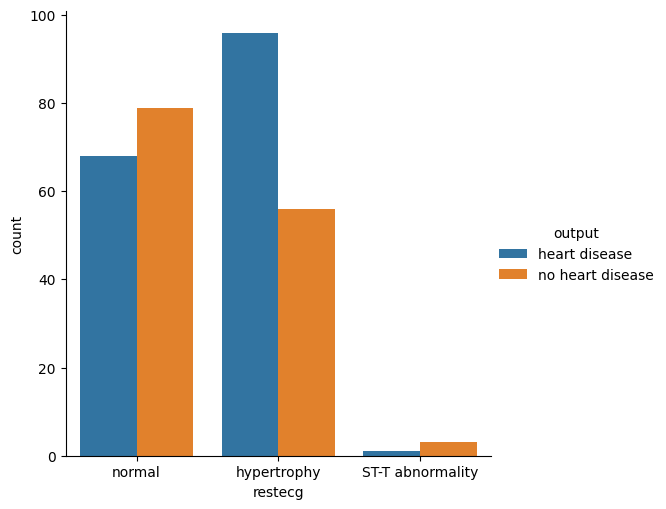

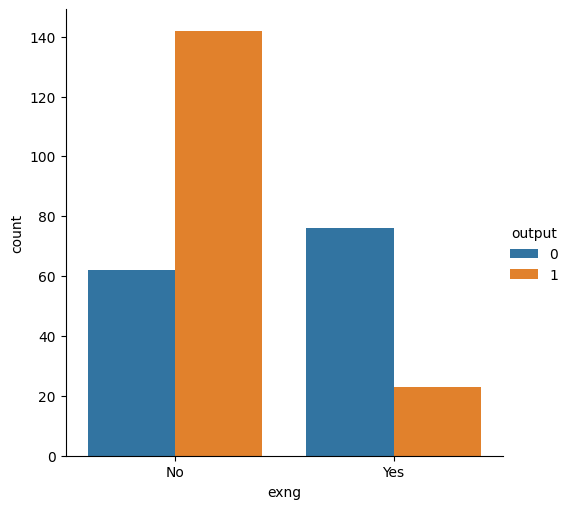

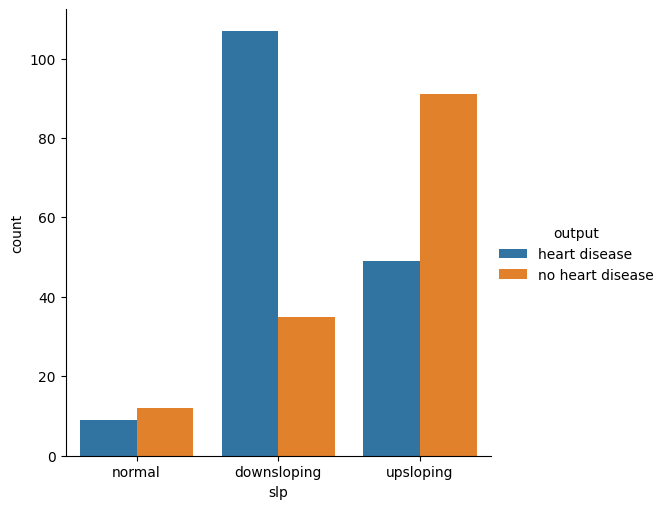

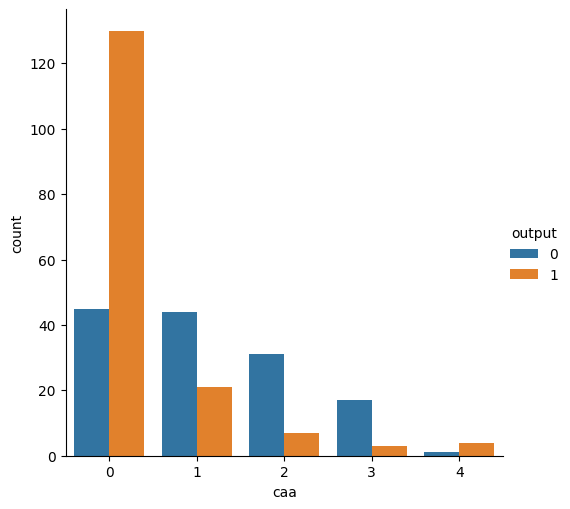

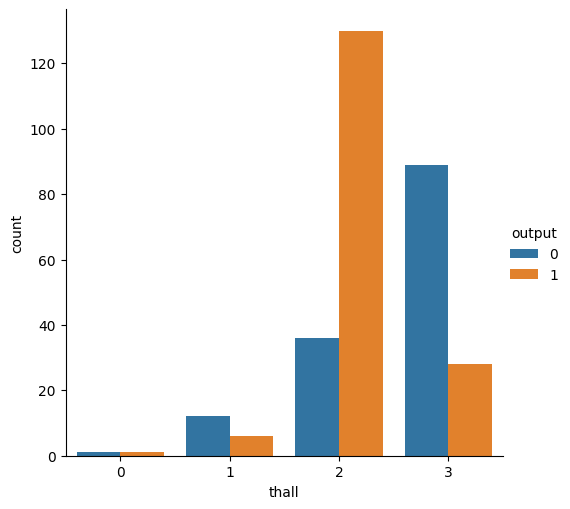

In [26]:
# Analysis of categorical features with respect to output
sex_data = heart_data[['sex','output']]
sex_data['sex'] = sex_data['sex'].replace([1],'male')
sex_data['sex'] = sex_data['sex'].replace([0],'female')
sex_data['output'] = sex_data['output'].replace([0],'no heart disease')
sex_data['output'] = sex_data['output'].replace([1],'heart disease')
cp_data = heart_data[['cp','output']]
cp_data['cp'] = cp_data['cp'].replace([0],'asymptomatic')
cp_data['cp'] = cp_data['cp'].replace([1],'atypical')
cp_data['cp'] = cp_data['cp'].replace([2],'non-anginal')
cp_data['cp'] = cp_data['cp'].replace([3],'typical')
cp_data['output'] = cp_data['output'].replace([0],'no heart disease')
cp_data['output'] = cp_data['output'].replace([1],'heart disease')
fbs_data = heart_data[['fbs','output']]
fbs_data['fbs'] = fbs_data['fbs'].replace([0],'<= 120 mg/dl')
fbs_data['fbs'] = fbs_data['fbs'].replace([1],'> 120 mg/dl')
fbs_data['output'] = fbs_data['output'].replace([0],'no heart disease')
fbs_data['output'] = fbs_data['output'].replace([1],'heart disease')                   
ecg_data = heart_data[['restecg','output']]           
ecg_data['restecg'] = ecg_data['restecg'].replace([0],'normal')
ecg_data['restecg'] = ecg_data['restecg'].replace([1],'hypertrophy')
ecg_data['restecg'] = ecg_data['restecg'].replace([2],'ST-T abnormality')
ecg_data['output'] = ecg_data['output'].replace([0],'no heart disease')
ecg_data['output'] = ecg_data['output'].replace([1],'heart disease')
exng_data = heart_data[['exng','output']]                 
exng_data['exng'] = exng_data['exng'].replace([0],'No')
exng_data['exng'] = exng_data['exng'].replace([1],'Yes')
slp_data = heart_data[['slp','output']]  
slp_data['slp'] = slp_data['slp'].replace([0],'normal')
slp_data['slp'] = slp_data['slp'].replace([1],'upsloping')
slp_data['slp'] = slp_data['slp'].replace([2],'downsloping')
slp_data['output'] = slp_data['output'].replace([0],'no heart disease')
slp_data['output'] = slp_data['output'].replace([1],'heart disease')
sns.catplot(x="sex", data=sex_data, kind="count", hue="output")
sns.catplot(x="cp", data=cp_data, kind="count", hue="output")
sns.catplot(x="fbs", data=fbs_data, kind="count", hue="output")
sns.catplot(x="restecg", data=ecg_data, kind="count", hue="output")
sns.catplot(x="exng", data=exng_data, kind="count", hue="output")
sns.catplot(x="slp", data=slp_data, kind="count", hue="output")
sns.catplot(x="caa", data=heart_data, kind="count", hue="output")
sns.catplot(x="thall", data=heart_data, kind="count", hue="output")

***

# MODEL PREPARATION

In [27]:
# Assigning variables
y = heart_data['output']
X = heart_data.drop('output', axis=1)

In [28]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [29]:
# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Dummy classifier (expected baseline accuracy)
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_score = dummy_clf.score(X_test, y_test)
print("The expected success rate from guessing is", dummy_score)

The expected success rate from guessing is 0.5737704918032787


***

# CLASSIFICATION MODELS

In [31]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Logistic Regression Confussion Matrix:")
print(lr_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression:")
print(lr_acc_score*100, '%')

Logistic Regression Confussion Matrix:
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression:
85.24590163934425 %


In [32]:
# Support Vector Classifier Model 
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_acc_score = accuracy_score(y_test, svc_predict)
print("Support Vector Classifier Confussion Matrix:")
print(svc_conf_matrix)
print('\n')
print("Accuracy of Support Vector Classifier:")
print(svc_acc_score*100, '%')

Support Vector Classifier Confussion Matrix:
[[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier:
88.52459016393442 %


In [33]:
# K-Nearest Neighbor Model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("K-Nearest Neighbors Confussion Matrix")
print(knn_conf_matrix)
print('\n')
print("Accuracy of K-Nearest Neighbors Model:")
print(knn_acc_score*100, '%')

K-Nearest Neighbors Confussion Matrix
[[24  3]
 [ 4 30]]


Accuracy of K-Nearest Neighbors Model:
88.52459016393442 %


In [34]:
# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print("Naive Bayes Confussion Matrix")
print(nb_conf_matrix)
print('\n')
print("Accuracy of Naive Bayes Model:")
print(nb_acc_score*100, '%')

Naive Bayes Confussion Matrix
[[21  6]
 [ 3 31]]


Accuracy of Naive Bayes Model:
85.24590163934425 %


In [35]:
# Decision Tree Model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
dtc_conf_matrix = confusion_matrix(y_test, dtc_predict)
dtc_acc_score = accuracy_score(y_test, dtc_predict)
print("Decision Tree Classifier Confussion Matrix")
print(dtc_conf_matrix)
print('\n')
print("Accuracy of Decision Tree Classifier Model:")
print(dtc_acc_score*100, '%')

Decision Tree Classifier Confussion Matrix
[[21  6]
 [10 24]]


Accuracy of Decision Tree Classifier Model:
73.77049180327869 %


In [36]:
# Random Forest Model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc_conf_matrix = confusion_matrix(y_test, rfc_predict)
rfc_acc_score = accuracy_score(y_test, rfc_predict)
print("Random Forest Classifier Confussion Matrix")
print(rfc_conf_matrix)
print('\n')
print("Accuracy of Random Forest Classifier Model:")
print(rfc_acc_score*100, '%')

Random Forest Classifier Confussion Matrix
[[24  3]
 [ 4 30]]


Accuracy of Random Forest Classifier Model:
88.52459016393442 %


In [37]:
# Extreme Gradient Boost Model
xgb = XGBClassifier(learning_rate=0.01, n_estimators= 100, max_depth=10, booster='dart',use_label_encoder= False)
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)
xgb_acc_score = accuracy_score(y_test, xgb_predict)
print("Extreme Gradient Boosting Confussion Matrix")
print(xgb_conf_matrix)
print('\n')
print("Accuracy of Extreme Gradient Boosting Model:")
print(xgb_acc_score*100, '%')

[17:00:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extreme Gradient Boosting Confussion Matrix
[[21  6]
 [ 5 29]]


Accuracy of Extreme Gradient Boosting Model:
81.9672131147541 %


In [38]:
# Creating Dataframe of Model Accuracies
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Support Vector Classifier','K-Nearest Neighbour','Naive Bayes','Decision Tree','Random Forest','Extreme Gradient Boost'],
                         'Accuracy': [lr_acc_score*100, svc_acc_score*100, knn_acc_score*100,nb_acc_score*100, dtc_acc_score*100, rfc_acc_score*100, xgb_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.245902
1,Support Vector Classifier,88.524590
2,K-Nearest Neighbour,88.524590
3,Naive Bayes,85.245902
4,Decision Tree,73.770492
5,Random Forest,88.524590
6,Extreme Gradient Boost,81.967213


In [39]:
#Stacking CV Classifier (Ensemble) Model of two best models
scv=StackingCVClassifier(classifiers=[svc,knn],meta_classifier= svc, random_state= 25)
scv.fit(X_train,y_train)
scv_predict = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predict)
scv_acc_score = accuracy_score(y_test, scv_predict)
print("Stacking CV Classifier Confusion Matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of Stacking CV Classifier Model:",scv_acc_score*100,'\n')

Stacking CV Classifier Confusion Matrix
[[23  4]
 [ 2 32]]


Accuracy of Stacking CV Classifier Model: 90.1639344262295 



***

# MODEL ANALYSIS

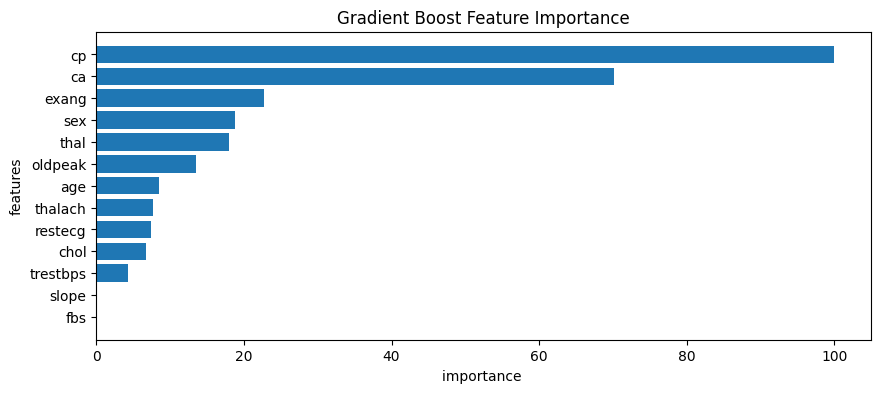

In [40]:
# Feature importance of Extreme Gradient Boost Model
xgb_imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': (((xgb.feature_importances_ * 100) / (xgb.feature_importances_.max() * 100) *100))})
xgb_imp_feature.sort_values(by = 'Importance', inplace=True)
plt.figure(figsize=(10,4))
plt.title("Gradient Boost Feature Importance")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(xgb_imp_feature['Feature'],xgb_imp_feature['Importance'])
plt.show()

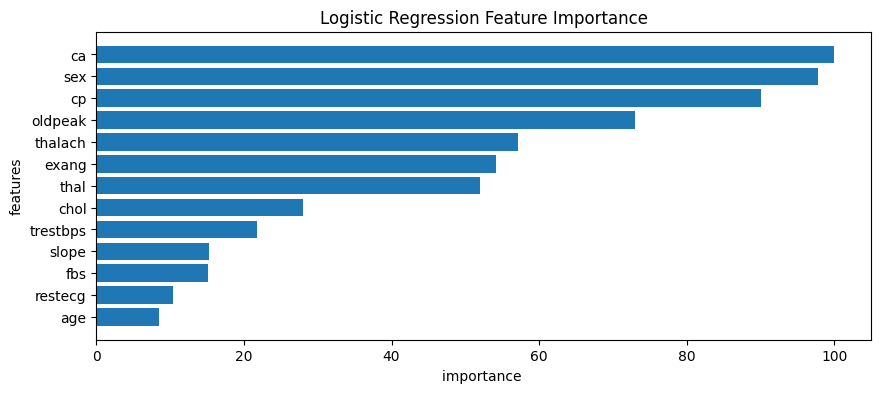

In [41]:
# Feature importance of Logistic Regression Model
log_imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': (abs(lr.coef_[0] * 100))/(abs(lr.coef_[0] * 100)).max()*100})
log_imp_feature.sort_values('Importance', inplace = True)
plt.figure(figsize=(10,4))
plt.title("Logistic Regression Feature Importance")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(log_imp_feature['Feature'],log_imp_feature['Importance'])
plt.show()

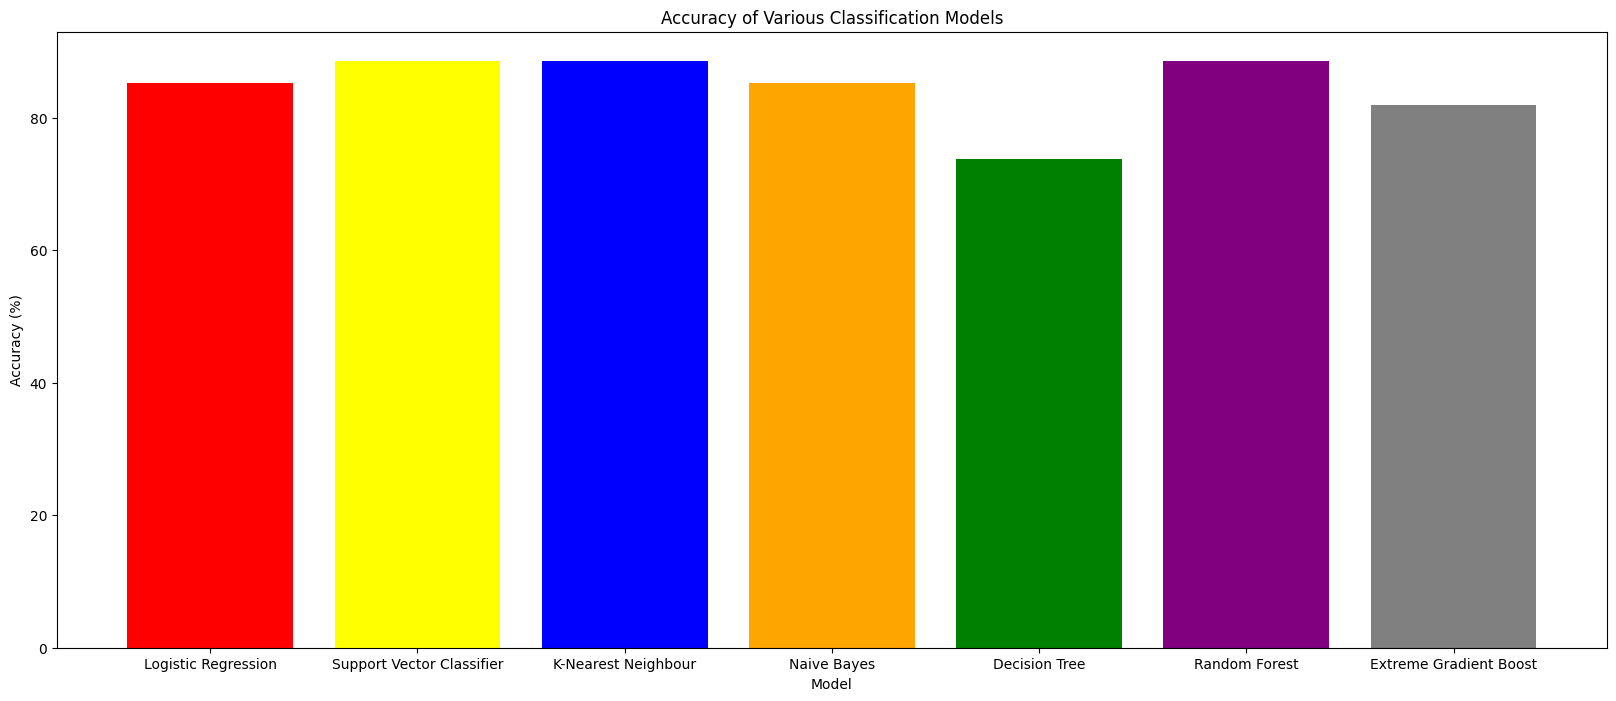

In [42]:
# Plotting accuracy of various classification models
colors = ['red','yellow','blue','orange','green','purple','grey',]
plt.figure(figsize=(20,8))
plt.title("Accuracy of Various Classification Models")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

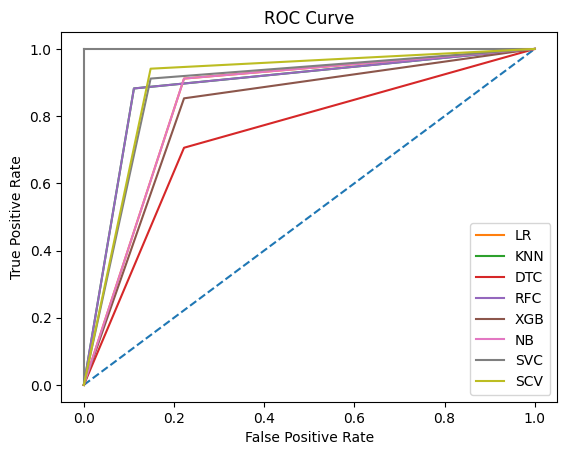

In [43]:
# ROC curves of models
fpr_lr, tpr_lr, thr_lr = roc_curve(y_test, lr_predict)
fpr_svc, tpr_svc, thr_log = roc_curve(y_test, svc_predict)
fpr_knn, tpr_knn, thr_knn = roc_curve(y_test, knn_predict)
fpr_nb, tpr_nb, thr_log = roc_curve(y_test, nb_predict)
fpr_dtc, tpr_dtc, thr_dtc = roc_curve(y_test, dtc_predict)
fpr_rfc, tpr_rfc, thr_rfc = roc_curve(y_test, rfc_predict)
fpr_xgb, tpr_xgb, thr_log = roc_curve(y_test, xgb_predict)
fpr_scv, tpr_scv, thr_scv = roc_curve(y_test, scv_predict)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.plot(fpr_lr, tpr_lr,label = 'LR')
plt.plot(fpr_knn, tpr_knn,label = 'KNN')
plt.plot(fpr_dtc, tpr_dtc,label = 'DTC')
plt.plot(fpr_rfc, tpr_rfc,label = 'RFC')
plt.plot(fpr_xgb,tpr_xgb,label= 'XGB')
plt.plot(fpr_nb,tpr_nb,label= 'NB')
plt.plot(fpr_svc,tpr_svc,label= 'SVC')
plt.plot(fpr_scv, tpr_scv,label = 'SCV')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.title('ROC Curve')
plt.show()

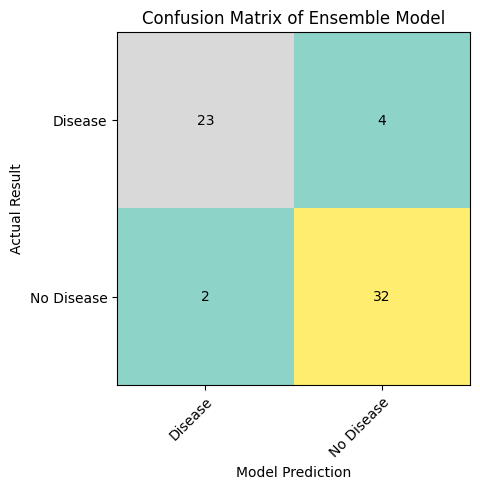

In [44]:
# Confusion Matrix of Ensemble Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(scv_conf_matrix, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, scv_conf_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Ensemble Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()

***

# CONCLUSION

In conclusion, we were able to successfully analyze the data and create a classification model that is able to predict whether or not a patient has heart disease with 90% accuracy. This was accomplished by using an ensemble method that combined two of our best classification models.